# CSDID usage Tutorial

## Example 1: Base

### Initialization

In [1]:
from csdid.att_gt import ATTgt
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/d2cml-ai/csdid/function-aggte/data/mpdta.csv")
data.head()

,year,countyreal,lpop,lemp,first.treat,treat
0,2003,8001,5.896761,8.461469,2007,1
1,2004,8001,5.896761,8.336870,2007,1
2,2005,8001,5.896761,8.340217,2007,1
3,2006,8001,5.896761,8.378161,2007,1
4,2007,8001,5.896761,8.487352,2007,1


In [2]:
type(data)

pandas.core.frame.DataFrame

### Estimation

In [3]:
%%time
out = ATTgt(yname = "lemp",
              gname = "first.treat",
              idname = "countyreal",
              tname = "year",
              xformla = f"lemp~1",
              data = data,
              ).fit(est_method = 'dr')
out.summ_attgt().summary2

CPU times: total: 156 ms
Wall time: 159 ms


,Group,Time,"ATT(g, t)",Post,Std. Error,[95% Pointwise,Conf. Band],
0,2004,2004,-0.0105,1,0.0346,-0.1000,0.0790,
1,2004,2005,-0.0704,1,0.0439,-0.1838,0.0429,
2,2004,2006,-0.1373,1,0.0538,-0.2763,0.0018,
3,2004,2007,-0.1008,1,0.0454,-0.2181,0.0165,
4,2006,2004,0.0065,0,0.0348,-0.0834,0.0965,
5,2006,2005,-0.0028,0,0.0267,-0.0717,0.0662,
6,2006,2006,-0.0046,1,0.0253,-0.0700,0.0608,
7,2006,2007,-0.0412,1,0.0295,-0.1174,0.0350,
8,2007,2004,0.0305,0,0.0276,-0.0409,0.1019,
9,2007,2005,-0.0027,0,0.0301,-0.0805,0.0750,


### Agregation

In [4]:

out.aggte(typec='calendar');



Overall summary of ATT's based on calendar time aggregation:
    ATT Std. Error  [95.0%  Conf. Int.] 
-0.0417     0.0223 -0.0855       0.0021 


Time Effects (calendar):
   Time  Estimate  Std. Error  [95.0% Simult.   Conf. Band  
0  2004   -0.0105      0.0328          -0.0749      0.0539  
1  2005   -0.0704      0.0414          -0.1515      0.0106  
2  2006   -0.0488      0.0276          -0.1029      0.0053  
3  2007   -0.0371      0.0238          -0.0837      0.0096  
---
Signif. codes: `*' confidence band does not cover 0
Control Group:  Never Treated , 
Anticipation Periods:  0
Estimation Method:  Doubly Robust




### Plots

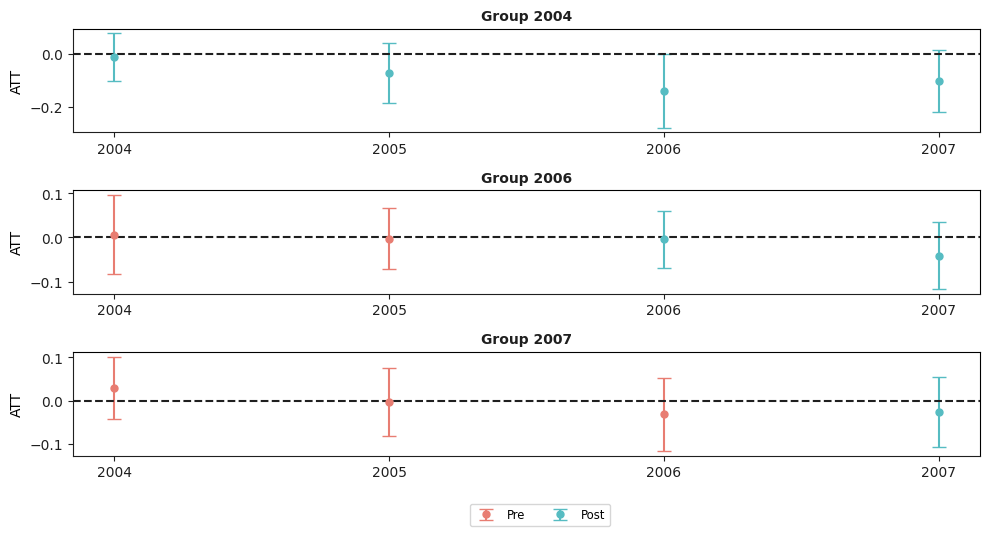

In [5]:
out.plot_attgt();

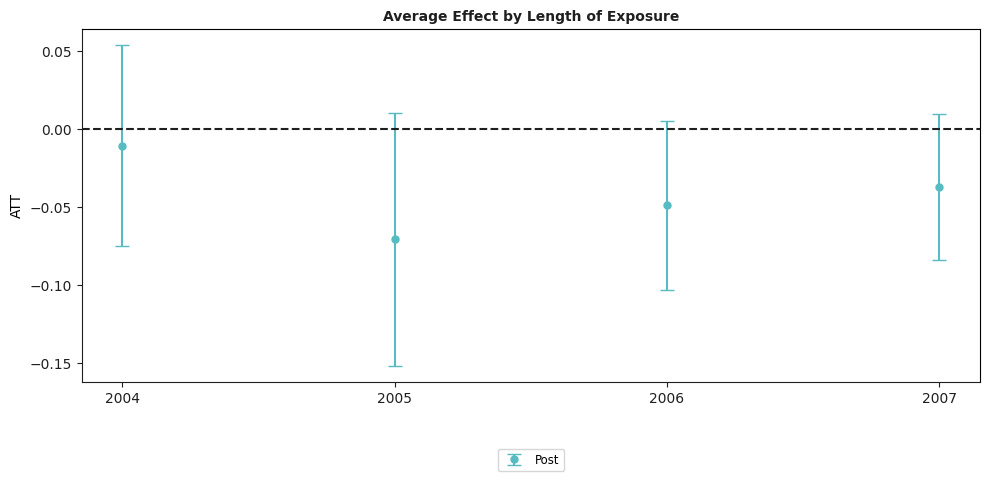

In [6]:
out.plot_aggte();

## Example 2: With PySpark (Pandas API) 
### Initialization

In [7]:
import findspark
from pyspark.sql import SparkSession
findspark.init()

In [8]:
from csdid.att_gt import ATTgt
import pandas as pd
import pandas as pd
import numpy as np
import pyspark.pandas as ps
import warnings
warnings.filterwarnings('ignore')
from pyspark.sql import SparkSession
data = pd.read_csv("https://raw.githubusercontent.com/d2cml-ai/csdid/function-aggte/data/mpdta.csv")

c:\users\jhon\appdata\roaming\pypoetry\venv\lib\site-packages\pyspark\pandas\__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [9]:
data.head()

,year,countyreal,lpop,lemp,first.treat,treat
0,2003,8001,5.896761,8.461469,2007,1
1,2004,8001,5.896761,8.336870,2007,1
2,2005,8001,5.896761,8.340217,2007,1
3,2006,8001,5.896761,8.378161,2007,1
4,2007,8001,5.896761,8.487352,2007,1


In [10]:
%%time
psdata = ps.DataFrame(data)
psdata.head()

CPU times: total: 15.6 ms
Wall time: 4.22 s


,year,countyreal,lpop,lemp,first.treat,treat
0,2003,8001,5.896761,8.461469,2007,1
1,2004,8001,5.896761,8.336870,2007,1
2,2005,8001,5.896761,8.340217,2007,1
3,2006,8001,5.896761,8.378161,2007,1
4,2007,8001,5.896761,8.487352,2007,1


### Estimation

In [11]:
%%time
out = ATTgt(yname = "lemp",
              gname = "first.treat",
              idname = "countyreal",
              tname = "year",
              data = data,
              ).fit(est_method = 'dr', bstrap = True);
out.summ_attgt().summary2


CPU times: total: 141 ms
Wall time: 148 ms


,Group,Time,"ATT(g, t)",Post,Std. Error,[95% Pointwise,Conf. Band],
0,2004,2004,-0.0105,1,0.0337,-0.0998,0.0788,
1,2004,2005,-0.0704,1,0.0443,-0.1880,0.0472,
2,2004,2006,-0.1373,1,0.0519,-0.2751,0.0006,
3,2004,2007,-0.1008,1,0.0453,-0.2210,0.0194,
4,2006,2004,0.0065,0,0.0338,-0.0831,0.0962,
5,2006,2005,-0.0028,0,0.0270,-0.0745,0.0690,
6,2006,2006,-0.0046,1,0.0228,-0.0650,0.0558,
7,2006,2007,-0.0412,1,0.0277,-0.1147,0.0323,
8,2007,2004,0.0305,0,0.0280,-0.0437,0.1048,
9,2007,2005,-0.0027,0,0.0274,-0.0753,0.0699,


### Agregation

In [12]:
%%time
out.aggte(typec='calendar');



Overall summary of ATT's based on calendar time aggregation:
    ATT Std. Error  [95.0%  Conf. Int.] 
-0.0417     0.0243 -0.0894        0.006 


Time Effects (calendar):
   Time  Estimate  Std. Error  [95.0% Simult.   Conf. Band  
0  2004   -0.0105      0.0318          -0.0728      0.0518  
1  2005   -0.0704      0.0437          -0.1561      0.0152  
2  2006   -0.0488      0.0268          -0.1014      0.0037  
3  2007   -0.0371      0.0234          -0.0829      0.0088  
---
Signif. codes: `*' confidence band does not cover 0
Control Group:  Never Treated , 
Anticipation Periods:  0
Estimation Method:  Doubly Robust


CPU times: total: 141 ms
Wall time: 128 ms


### Plots

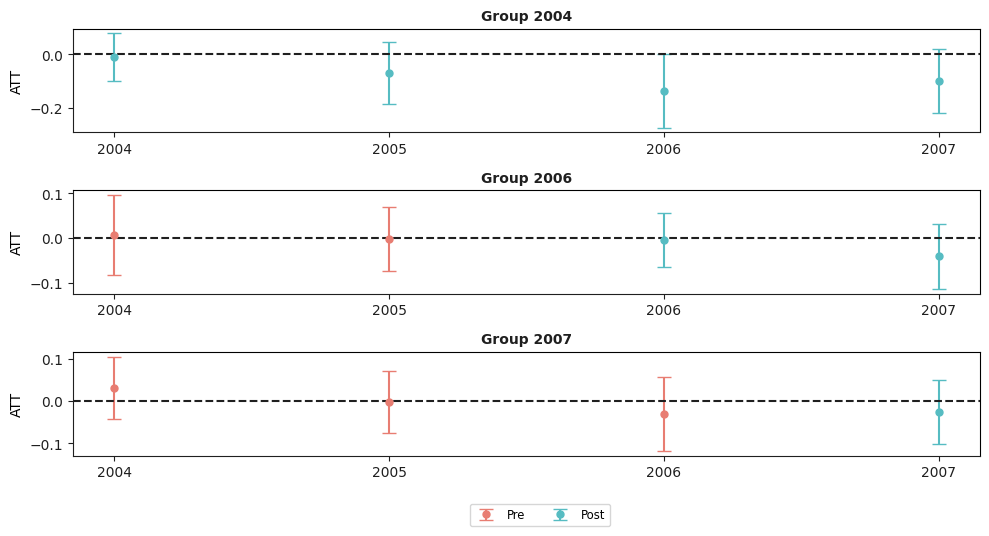

In [13]:
out.plot_attgt();

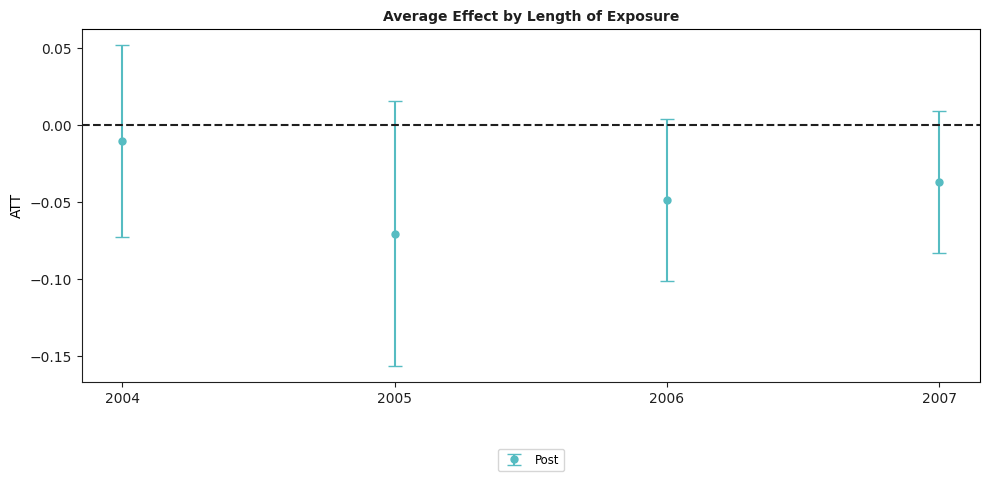

In [14]:
out.plot_aggte();

# Difference

### without pyspark

- CPU times: total: 156 ms- 
Wall time: 159 m
### with pyspark
- CPU times: total: 141 ms- 
Wall time: 148 mss